In [1]:
run src/preprocessing.ipynb

src/preprocessing.ipynb:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "train_df.Date = train_df.Date.astype(\"category\")\n",


### Check out the median, mean, and standard deviation for the train and test datasets to check if there are any huge variations.

In [6]:
train_stats = train_df.drop("Weekly_Sales", axis =1).describe()
train_stats

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,60980.583328,18.447931,0.458515,4956.920816,4867.493911,5487.601593,3560.353127,3573.795304,39.159276,1.863296
min,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,93638.000000,46.680000,2.933000,7246.420196,3334.628621,115.390000,3383.168256,4628.975079,132.022667,6.891000
50%,140167.000000,62.090000,3.452000,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,182.318780,7.866000
75%,202505.000000,74.280000,3.738000,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,212.416993,8.572000
max,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [7]:
test_stats = test_df.describe()
test_stats

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,136497.688921,53.941804,3.581546,7688.643048,3634.678465,2320.770254,3359.237575,3922.681189,175.051190,7.230757
std,61106.926438,18.724153,0.239442,10691.843188,7216.216937,13169.521383,7133.939752,19445.150745,33.823347,1.392766
min,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,93638.000000,39.820000,3.431000,1974.680000,306.120000,18.000000,200.480000,1309.300000,138.900429,6.228000
50%,140167.000000,54.470000,3.606000,4842.660000,1568.710000,94.925000,1239.780000,2390.430000,171.201947,7.960289
75%,202505.000000,67.350000,3.766000,9427.410000,3334.628621,418.520000,3383.168256,4227.270000,201.212230,7.960289
max,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


In [8]:
train_stats - test_stats

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,306506.000000,306506.000000,306506.000000,306506.000000,3.065060e+05,306506.000000,3.065060e+05,306506.000000,306506.000000,306506.000000
mean,230.226818,6.148255,-0.220520,-442.222852,-3.000498e+02,-881.348870,2.393068e+01,706.293890,-3.849244,0.729531
std,-126.343110,-0.276222,0.219073,-5734.922372,-2.348723e+03,-7681.919790,-3.573587e+03,-15871.355441,5.335928,0.470530
min,0.000000,5.230000,-0.400000,2781.720000,-2.300200e+02,150.160000,0.000000e+00,320.330000,-5.172226,0.195000
25%,0.000000,6.860000,-0.498000,5271.740196,3.028509e+03,97.390000,3.182688e+03,3319.675079,-6.877762,0.663000
50%,0.000000,7.620000,-0.154000,2403.760196,1.765919e+03,1344.496384,2.143388e+03,2238.545079,11.116833,-0.094289
75%,0.000000,6.930000,-0.028000,-2180.989804,4.547474e-13,1020.901384,1.364242e-12,401.705079,11.204763,0.611711
max,0.000000,-1.810000,0.343000,-14538.220000,3.344537e+04,-7852.700000,2.130210e+03,-662928.820000,-1.743650,4.114000


In [52]:
train_stats_mean_median_std = train_stats.T[["mean", "std"]]
train_stats_mean_median_std["median"] = train_df.median()
train_stats_mean_median_std["features"] = train_stats_mean_median_std.index
train_stats_mean_median_std

,mean,std,median,features
Size,136727.915739,60980.583328,140167.000000,Size
Temperature,60.090059,18.447931,62.090000,Temperature
Fuel_Price,3.361027,0.458515,3.452000,Fuel_Price
MarkDown1,7246.420196,4956.920816,7246.420196,MarkDown1
MarkDown2,3334.628621,4867.493911,3334.628621,MarkDown2
MarkDown3,1439.421384,5487.601593,1439.421384,MarkDown3
MarkDown4,3383.168256,3560.353127,3383.168256,MarkDown4
MarkDown5,4628.975079,3573.795304,4628.975079,MarkDown5
CPI,171.201947,39.159276,182.318780,CPI
Unemployment,7.960289,1.863296,7.866000,Unemployment


In [53]:
test_stats_mean_median_std = test_stats.T[["mean", "std"]]
test_stats_mean_median_std["median"] = test_df.median()
test_stats_mean_median_std["features"] = test_stats_mean_median_std.index
test_stats_mean_median_std

,mean,std,median,features
Size,136497.688921,61106.926438,140167.000000,Size
Temperature,53.941804,18.724153,54.470000,Temperature
Fuel_Price,3.581546,0.239442,3.606000,Fuel_Price
MarkDown1,7688.643048,10691.843188,4842.660000,MarkDown1
MarkDown2,3634.678465,7216.216937,1568.710000,MarkDown2
MarkDown3,2320.770254,13169.521383,94.925000,MarkDown3
MarkDown4,3359.237575,7133.939752,1239.780000,MarkDown4
MarkDown5,3922.681189,19445.150745,2390.430000,MarkDown5
CPI,175.051190,33.823347,171.201947,CPI
Unemployment,7.230757,1.392766,7.960289,Unemployment


In [98]:
train_melt = pd.melt(train_stats_mean_median_std, id_vars="features")
train_melt["title"] = train_melt["features"] + str(" - ") + train_melt["variable"]
train_melt

,features,variable,value,title
0,Size,mean,136727.915739,Size - mean
1,Temperature,mean,60.090059,Temperature - mean
2,Fuel_Price,mean,3.361027,Fuel_Price - mean
3,MarkDown1,mean,7246.420196,MarkDown1 - mean
4,MarkDown2,mean,3334.628621,MarkDown2 - mean
5,MarkDown3,mean,1439.421384,MarkDown3 - mean
6,MarkDown4,mean,3383.168256,MarkDown4 - mean
7,MarkDown5,mean,4628.975079,MarkDown5 - mean
8,CPI,mean,171.201947,CPI - mean
9,Unemployment,mean,7.960289,Unemployment - mean


### Based on the plot, we don't see huge variations except for the feature size. This is probably due to the large numbers in the size column.

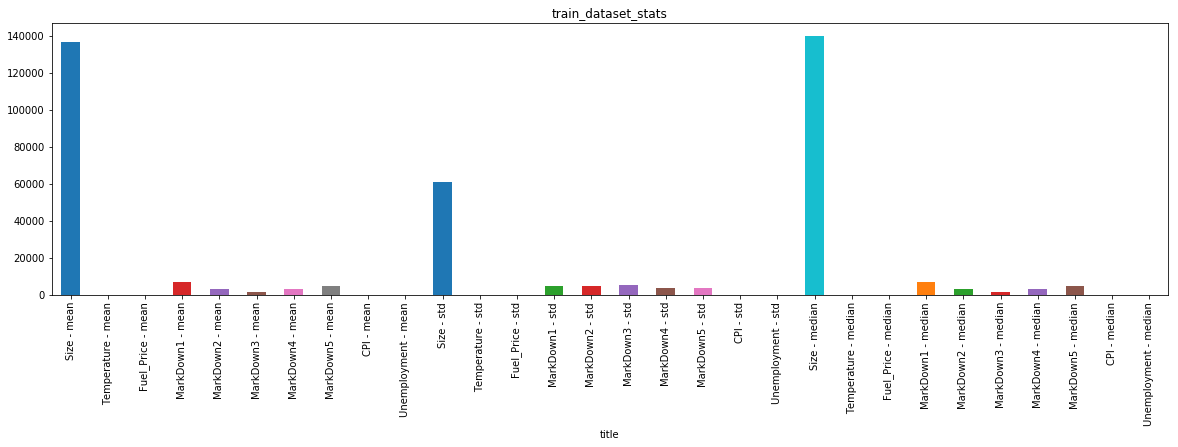

In [102]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (20,5))

train_melt.plot(x="title", y="value", kind="bar", figsize = (20,5), legend=False, title="train_dataset_stats")

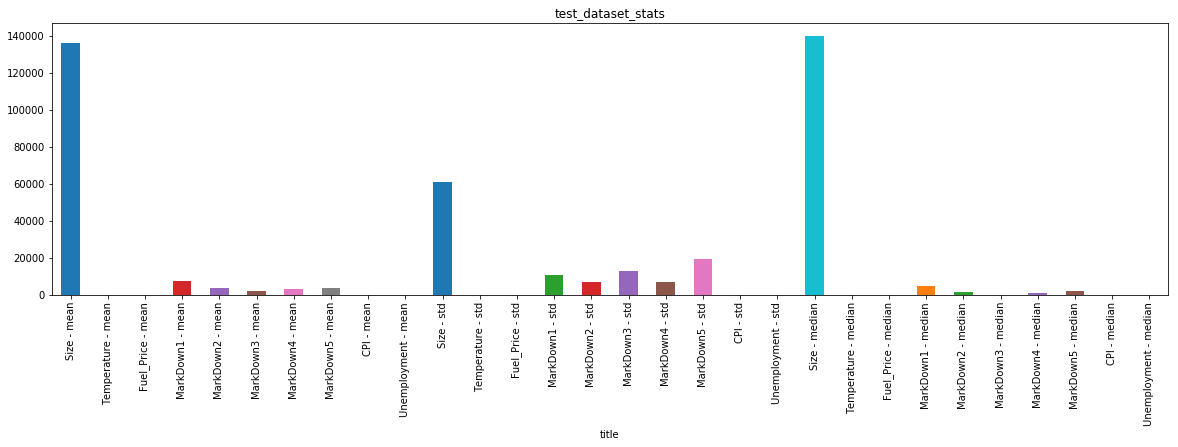

In [104]:
test_melt = pd.melt(test_stats_mean_median_std, id_vars="features")
test_melt["title"] = test_melt["features"] + str(" - ") + test_melt["variable"]
test_melt

test_melt.plot(x="title", y="value", kind="bar", figsize = (20,5), legend=False, title="test_dataset_stats")

In [110]:
train_df

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,0,1,24924.50,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
1,1,2010-02-05,0,26,11737.12,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
2,1,2010-02-05,0,17,13223.76,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
3,1,2010-02-05,0,45,37.44,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
4,1,2010-02-05,0,28,1085.29,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
5,1,2010-02-05,0,79,46729.77,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
6,1,2010-02-05,0,55,21249.31,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
7,1,2010-02-05,0,5,32229.38,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
8,1,2010-02-05,0,58,7659.97,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
9,1,2010-02-05,0,7,21084.08,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106


In [114]:
categorical_test_df.Dept.unique()

[1, 26, 17, 45, 28, ..., 77, 50, 43, 39, 65]
Length: 81
Categories (81, int64): [1, 26, 17, 45, ..., 50, 43, 39, 65]

In [113]:
numeric_test_df

,Date,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
1,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
2,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
3,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
4,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
5,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
6,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
7,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
8,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
9,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.820000,3639.9,2737.42,223.462779,6.573000
